# Cohort Analysis

# Plan:
- Defying the cohorts based on a specific characteristic or event. 
- Determining the time intervals for analysis.
- Grouping users into cohorts based on the defined characteristic or event.
- Choosing the key performance metrics for analysis.
- Calculating the chosen metrics for each cohort over the specified time periods.
- Creating visualizations to present findings effectively.

Let’s get started by importing the necessary Python libraries and the dataset:

In [3]:
import pandas as pd

data = pd.read_csv('/Users/Илья/Downloads/cohorts.csv')
data.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


Let’s have a look at whether the dataset has any null values or not:

In [4]:
missing_values = data.isnull().sum()
missing_values

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64

Let’s have a look at the datatypes of all the columns in the data:

In [5]:
data_types = data.dtypes
data_types

Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

The Date column is in object (string) format. For effective analysis, especially in cohort analysis, we should convert this to a datetime format:

In [6]:
# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

Let’s have a look at the descriptive statistics of the dataset:

In [7]:
descriptive_stats = data.describe()
descriptive_stats

,New users,Returning users,Duration Day 1,Duration Day 7
count,30.000000,30.000000,30.000000,30.000000
mean,3418.166667,1352.866667,208.259594,136.037157
std,677.407486,246.793189,64.730830,96.624319
min,1929.000000,784.000000,59.047619,0.000000
25%,3069.000000,1131.500000,182.974287,68.488971
50%,3514.500000,1388.000000,206.356554,146.381667
75%,3829.500000,1543.750000,230.671046,220.021875
max,4790.000000,1766.000000,445.872340,304.350000


According to the descriptive stats:
- **New Users**: The average number of new users is around `3,418` with a standard deviation of approximately `677`. The minimum and maximum new users recorded are `1,929` and `4,790`, respectively.
- **Returning Users**: On average, there are about `1,353` returning users, with a standard deviation of around `247`. The minimum and maximum are `784` and `1,766`, respectively.
- **Duration Day 1**: The average duration on the first day is about `208` seconds with a considerable spread (standard deviation is around `65`).
- **Duration Day 7**: The average 7-day duration is lower, around `136` seconds, with a larger standard deviation of about 97. The range is from `0` to `304`.

Now, let’s have a look at the trend of the new and returning users over time:

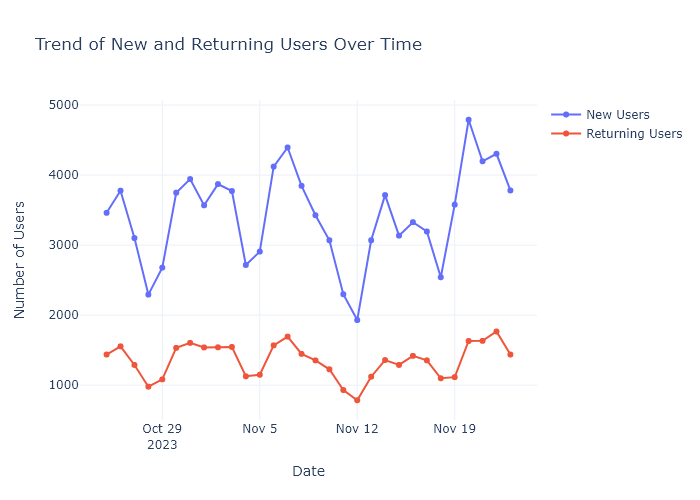

In [8]:
import plotly.graph_objects as go
import plotly.express as px

import plotly.io as pio
pio.templates.default = "plotly_white"

# Trend analysis for New and Returning Users
fig = go.Figure()

# New Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['New users'], mode='lines+markers', name='New Users'))

# Returning Users
fig.add_trace(go.Scatter(x=data['Date'], y=data['Returning users'], mode='lines+markers', name='Returning Users'))

# Update layout
fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')

fig.show(renderer='png')

Let’s have a look at the trend of duration over time:

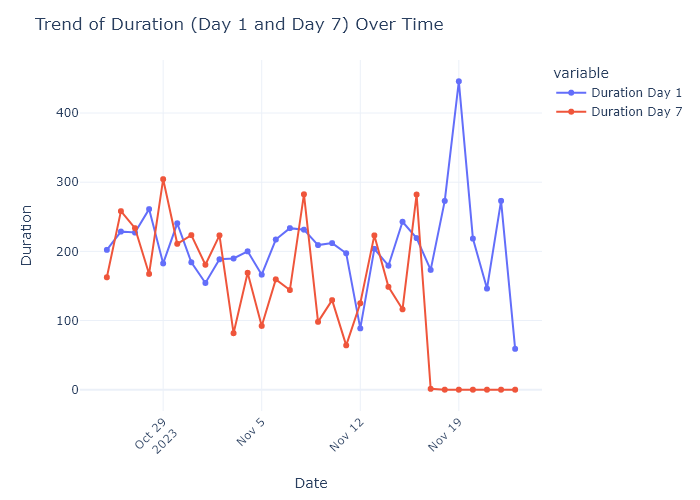

In [9]:
fig = px.line(data_frame=data, x='Date', y=['Duration Day 1', 'Duration Day 7'], markers=True, labels={'value': 'Duration'})
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time', xaxis_title='Date', yaxis_title='Duration', xaxis=dict(tickangle=-45))
fig.show(renderer='png')

The correlation between the variables:

C:\Users\Илья\AppData\Local\Temp\ipykernel_16496\71721387.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



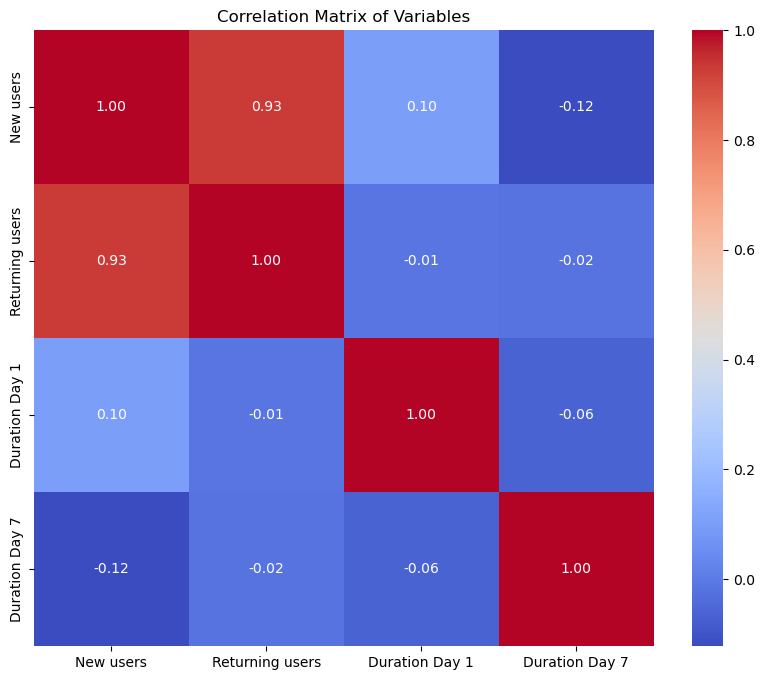

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

We can see that the strongest correlation is between the number of new and returning users, indicating a potential trend of new users converting to returning users.

## Performing cohort analysis

In [11]:
# Grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

# Calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users': 'mean',
    'Returning users': 'mean',
    'Duration Day 1': 'mean',
    'Duration Day 7': 'mean'
}).reset_index()

weekly_averages.head()

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


Let’s have a look at the weekly average of the new and returning users and the duration:

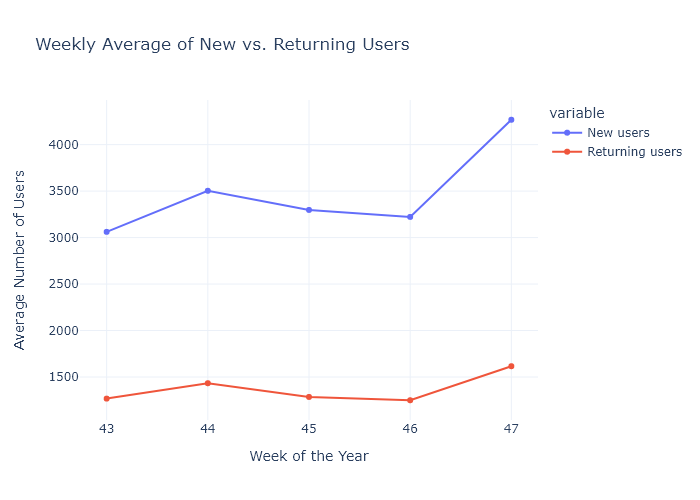

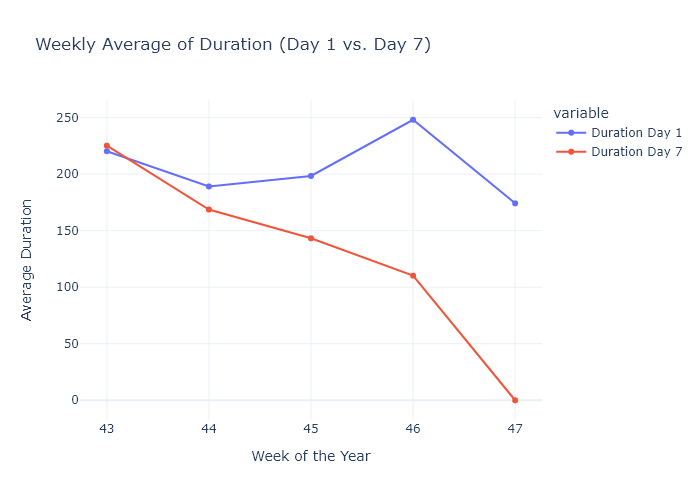

In [12]:
fig1 = px.line(weekly_averages, x='Week', y=['New users', 'Returning users'], markers=True,
               labels={'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x='Week', y=['Duration Day 1', 'Duration Day 7'], markers=True,
               labels={'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show(renderer='png')
fig2.show(renderer='png')

Now, let’s create a cohort chart to understand the cohort matrix of weekly averages. In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric:
- Average number of new users.
- Average number of returning users.
- Average duration on `Day 1`.
- Average duration on `Day 7`.

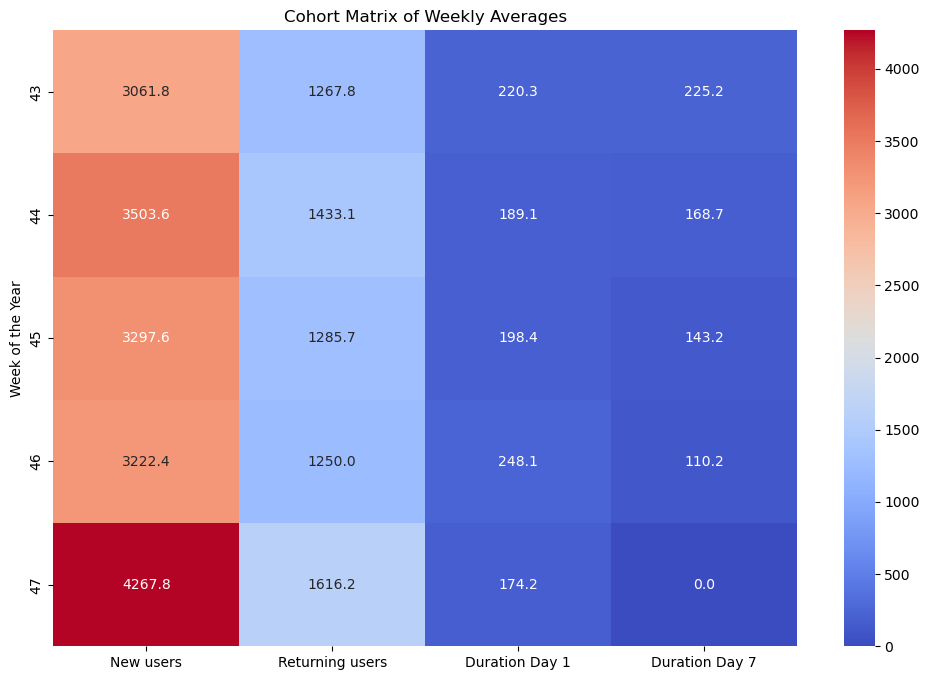

In [13]:
# Creating a cohort matrix
cohort_matrix = weekly_averages.set_index('Week')

# Plotting the cohort matrix
plt.figure(figsize=(12, 8))

sns.heatmap(cohort_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

We can see that the number of new users and returning users fluctuates from week to week. Notably, there was a significant increase in both new and returning users in `Week 47`. The average duration of user engagement on `Day 1` and `Day 7` varies across the weeks. The durations do not follow a consistent pattern about the number of new or returning users, suggesting that other factors might be influencing user engagement.